# Visualization after preprocessing data

In [65]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [66]:
!pip install nbimporter


In [67]:
import nbimporter
from PreprocessingPipeline import *


In [68]:
%run PreprocessingPipeline.ipynb

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Initial shape: (33716, 5)
Columns: ['Message ID', 'Subject', 'Message', 'Spam/Ham', 'Date']
After cleaning: (33716, 7)
label
1    17171
0    16545
Name: count, dtype: int64
After filtering: (33603, 8)
Max words now: 1984
TF-IDF Train Shape: (26882, 5000)
TF-IDF Test Shape: (6721, 5000)

 All Preprocessing steps complete! and Files are saved:
 X_train_tfidf.npz, X_test_tfidf.npz
 y_train.npy, y_test.npy
 tfidf_vectorizer.pkl


C:\Users\HP\AppData\Local\Temp\ipykernel_7200\2941130490.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='label', palette='Set2')


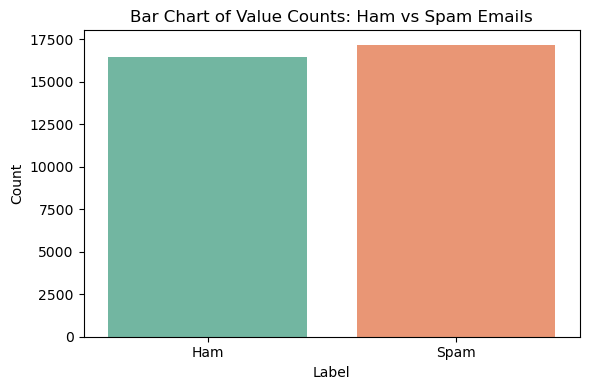

In [69]:
# Exploratory Plots After Preprocessing

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Spam vs Ham data countplot
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='label', palette='Set2')
plt.xticks([0, 1], ['Ham', 'Spam'])
plt.title('Bar Chart of Value Counts: Ham vs Spam Emails')
plt.xlabel('Label')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Max number of words in any cleaned email: 1984
95th percentile: 425 words
99th percentile: 820 words
Average length: 123 words | Median: 66 words


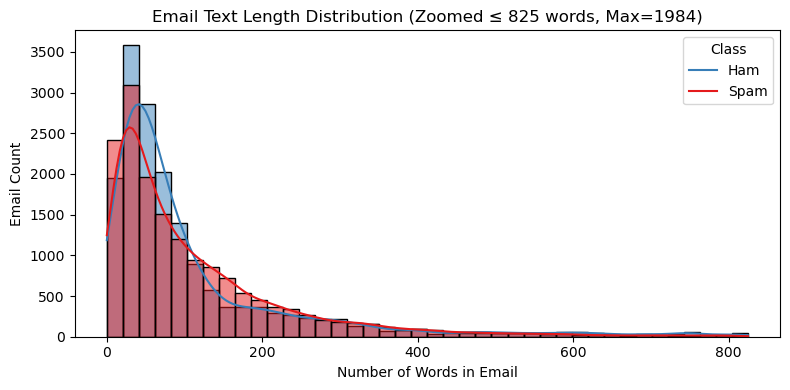

In [70]:
# Email Length Distribution 
df["text_length"] = df["clean_text"].str.split().apply(len)

# Descritive Statistics of words: max, mean, median , and percentiles
max_words = int(df["text_length"].max())
p95 = int(np.percentile(df["text_length"], 95))
p99 = int(np.percentile(df["text_length"], 99))
mean_len = int(df["text_length"].mean())
median_len = int(df["text_length"].median())

print(f"Max number of words in any cleaned email: {max_words}")
print(f"95th percentile: {p95} words")
print(f"99th percentile: {p99} words")
print(f"Average length: {mean_len} words | Median: {median_len} words")

xmax = p99 +5 # zooming plot for visualisation, based on 99 percentiles plus 5

plt.figure(figsize=(8,4))
sns.histplot(
    data=df[df["text_length"] <= xmax],  
    x="text_length",
    hue="label",
    bins=40,
    kde=True,
    common_norm=False,
    stat="count",
    palette="Set1"
)
plt.title(f"Email Text Length Distribution (Zoomed ≤ {xmax} words, Max={max_words})")
plt.xlabel("Number of Words in Email")
plt.ylabel("Email Count")
plt.legend(labels=["Ham","Spam"], title="Class")
plt.tight_layout()
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_7200\3743867430.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='text_length', data=df, palette="Set1")


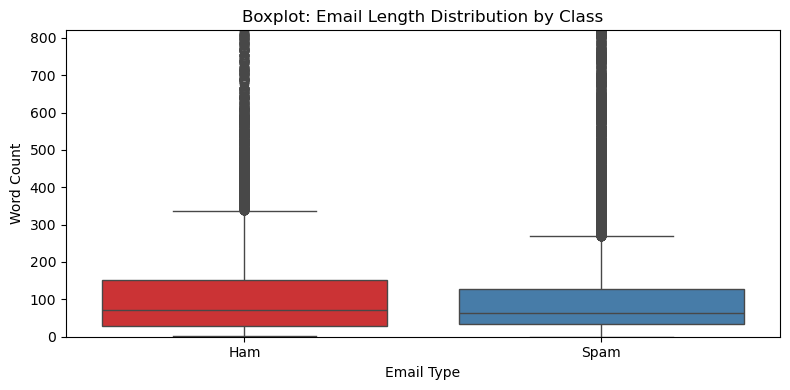

In [71]:
# Boxplot: Length distribution by class 
plt.figure(figsize=(8,4))
sns.boxplot(x='label', y='text_length', data=df, palette="Set1")
plt.xticks([0,1], ['Ham','Spam'])
plt.title("Boxplot: Email Length Distribution by Class")
plt.xlabel("Email Type")
plt.ylabel("Word Count")
plt.ylim(0, np.percentile(df["text_length"], 99)) 
plt.tight_layout()
plt.show()

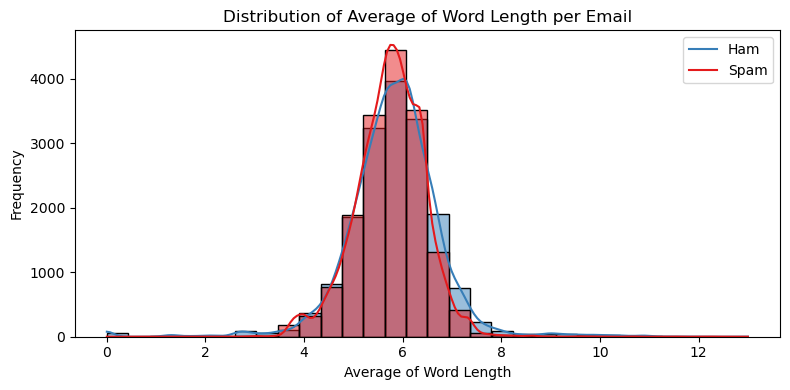

In [72]:
# Average Word Length per Email
def avg_word_len(text):
    words = text.split()
    return np.mean([len(w) for w in words]) if words else 0

df["avg_word_length"] = df["clean_text"].apply(avg_word_len)

plt.figure(figsize=(8,4))
sns.histplot(data=df, x="avg_word_length", hue="label", bins=30, kde=True, palette="Set1")
plt.title("Distribution of Average of Word Length per Email")
plt.xlabel("Average of Word Length")
plt.ylabel("Frequency")
plt.legend(labels=['Ham','Spam'])
plt.tight_layout()
plt.show()

Correlation matrix:
                  text_length  avg_word_length     label
text_length         1.000000         0.147138  0.006059
avg_word_length     0.147138         1.000000  0.039672
label               0.006059         0.039672  1.000000 



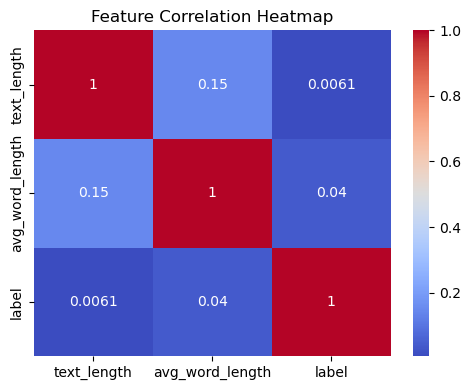

In [73]:
# Correlation between length of emails & spam
corr = df[["text_length", "avg_word_length", "label"]].corr()
print("Correlation matrix:\n", corr, "\n")
plt.figure(figsize=(5,4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

TF-IDF Density (non-zero fraction in training): 0.013658


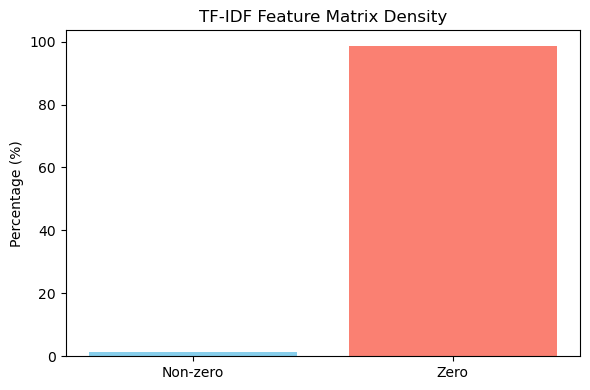

In [74]:
# TF-IDF Feature Density to visualize spatialty in matrixes
nonzero_train = X_train_tfidf.count_nonzero()
density_train = nonzero_train / (X_train_tfidf.shape[0] * X_train_tfidf.shape[1])
print(f"TF-IDF Density (non-zero fraction in training): {density_train:.6f}")
plt.figure(figsize=(6,4))
plt.bar(["Non-zero", "Zero"], [density_train*100, (1-density_train)*100], color=["skyblue", "salmon"])
plt.ylabel("Percentage (%)")
plt.title("TF-IDF Feature Matrix Density")
plt.tight_layout()
plt.show()

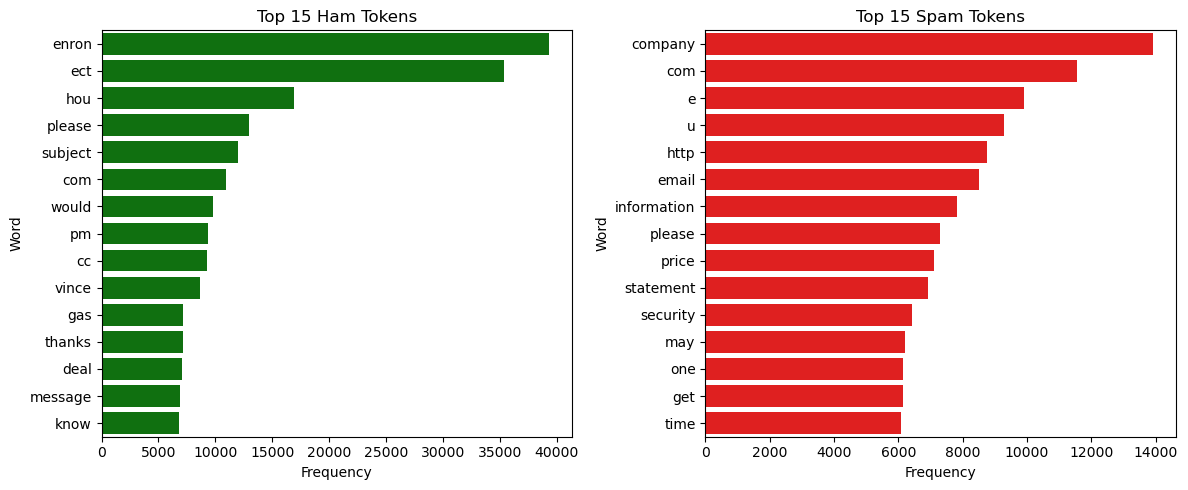

In [75]:
# Top frequent 15 tokens per class to visualize common words in ham vs spam

from collections import Counter

def get_top_tokens(texts, n=15):
    words = [w for text in texts for w in text.split()]
    return Counter(words).most_common(n)

top_ham = get_top_tokens(df[df['label']==0]["clean_text"], 15)
top_spam = get_top_tokens(df[df['label']==1]["clean_text"], 15)

ham_words, ham_counts = zip(*top_ham)
spam_words, spam_counts = zip(*top_spam)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.barplot(x=list(ham_counts), y=list(ham_words), color="green")
plt.title("Top 15 Ham Tokens")
plt.xlabel("Frequency")
plt.ylabel("Word")

plt.subplot(1,2,2)
sns.barplot(x=list(spam_counts), y=list(spam_words), color="red")
plt.title("Top 15 Spam Tokens")
plt.xlabel("Frequency")
plt.ylabel("Word")

plt.tight_layout()
plt.show()

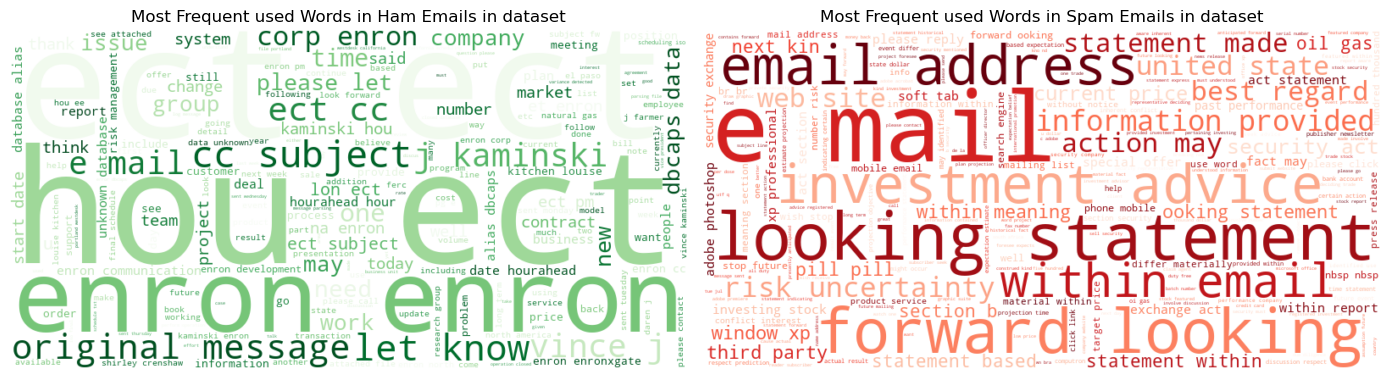

In [77]:
# Word Clouds for Spam vs Ham
spam_txt = " ".join(df[df["label"]==1]["clean_text"].tolist())
ham_txt = " ".join(df[df["label"]==0]["clean_text"].tolist())

spam_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(spam_txt)
ham_wordcloud  = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(ham_txt)

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Frequent used Words in Ham Emails in dataset")

plt.subplot(1,2,2)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Frequent used Words in Spam Emails in dataset")
plt.tight_layout()
plt.show()
